## Evaluation of Top Songs on Spotify in 2023

Collaborators: Andrew Hyssop Cha, Akash Patil, Nhat Nguyen

## Introduction and Motivation

Spotify has become a transformative force in the music and audio streaming industry, reshaping how we experience music. As the world’s leading music streaming platform with over 350 million users, Spotify not only offers a vast library of songs, podcasts, and audio content but also has grown into an over 28 billion dollar industry.

With Spotify’s presence, smaller artists are now able to distribute directly to listeners. This leads to an abundance of choice, with various smaller artists producing new styles of music.

With this abundance of choice, it is important to analyze what elements make up a popular song, which can help with getting more streams or anticipating what song will have a bigger impact in the industry. In order to accurately assess what features make up a popular song, we will be going through the data science pipeline to learn useful insights and create a model for predicting the success of a new song.

## Part 1: Data Collection

First, we import any libraries needed for our analysis. For our tutorial we used the ones below.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import traceback

Out of our imports Pandas is of particular value. It allows us to create Dataframes and manipulating them in easy and flexible ways.

The data set we have chosen is one from Kaggle, it consists of Spotify tracks from over a range of 125 different genres. Each track has some audio features associated with it. The data has been downloaded and is in CSV format. Data can be retrieved in many different ways and can come in many different formats; for example some data would have to be retrieved by scraping it off some website, and then be formatted, it could be acquired through some API request and received in something like JSON/XML format. In our case, as mentioned prior, the data is in a CSV(comma-separated values) file, so we can simply load that into a pandas dataframe using a pandas function.

In [3]:
df_master = pd.read_csv("spotify-2023.csv", sep=',', encoding='latin-1')
df_master.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


## Part 2: Data Processing

We now have our data loaded into a dataframe! Now we can manipulate it and start our data processing step. Firstly we can take a look at the shape of our of data, basically how many rows and columns it has.

In [4]:
print(df_master.shape)

(952, 24)


In [5]:
df_master.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

Here we can see a variety of features. Features like danceability_%, energy_%, and speechiness_% demonstrate how prevelant certain qualities are in a song. Features such as in_apple_charts and in_deezer_playlists show how popular songs are in other streaming platforms. Additionally, the release dates and number streams also make an appearance.

By figuring out which features are related to eachother we can plan out how we want to plot the data and what to compare the features against. For example, we will need a dependant variable to keep track of how successful a song is. From our features it seems like streams would be a good choice.

As we can see above, we have some inconsistencies within the type of our data. Lets start with the "in_x_playlists" and "in_x_charts" types, we can see that certain in playlist/chart features are of type int64, while others are of type object. By looking at the head of the dataframe printed above, and since the majority of them are int64, we can assume that all the features corresponding to the position of the song in the chart and how many playlists its in should be an int. So lets try and fix that, within our dataframe we can cast it to an int.

In [6]:
df_copy = df_master.copy()
try:
  df_copy['in_deezer_playlists'] = df_copy['in_deezer_playlists'].str.replace(",", "").astype(int)
  df_copy['in_shazam_charts'] = df_copy['in_shazam_charts'].str.replace(",", "").astype(int)
except Exception as e:
  traceback.print_exc()

Traceback (most recent call last):
  File "C:\Users\hysso\AppData\Local\Temp\ipykernel_8936\758552815.py", line 4, in <module>
    df_copy['in_shazam_charts'] = df_copy['in_shazam_charts'].str.replace(",", "").astype(int)
                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\hysso\anaconda3\Lib\site-packages\pandas\core\generic.py", line 6324, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\hysso\anaconda3\Lib\site-packages\pandas\core\internals\managers.py", line 451, in astype
    return self.apply(
           ^^^^^^^^^^^
  File "c:\Users\hysso\anaconda3\Lib\site-packages\pandas\core\internals\managers.py", line 352, in apply
    applied = getattr(b, f)(**kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\hysso\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py", line 511, in astype
    

This brought up an error. From the error message we can see that certain values within our dataset are NaN, which mean they don't exist. Now, there are many ways to remedy this, we could do something like interpolate missing data, we could fill it with 0 or with the mean/median value. In our case, we'll simply drop the missing values, and after we do that, we'll see how many examples remain and determine if simply dropping them is fine, or some further step should be taken.

In [7]:
df_master = df_master.dropna()
print(df_master.shape)

(816, 24)


After dropping all examples with non-existent data, we have ended up with 816 examples, this serves as enough examples for what we want to do with the data. Now that we've handled the non-existent data, let's try converting the chart and position data to the int type again!

In [8]:
df_master['in_deezer_playlists'] = df_master['in_deezer_playlists'].str.replace(",", "").astype(int)
df_master['in_shazam_charts'] = df_master['in_shazam_charts'].str.replace(",", "").astype(int)
df_master.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists      int32
in_deezer_charts         int64
in_shazam_charts         int32
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

That code ran just fine, and looking at our types again, we can see that the "in_x_playlists" and "in_x_charts" types are consistent with each other and are all int64 types. Now, looking at our artist data, we can see that it is an "object" type, if we look back at when we printed the head of our dataframe we can see that its most likely a string. Certain songs have more than one artist, and keeping them in a single string is not the best representation of them, so what we'll do is first rename the column, and then convert the comma separated artist names into an array of strings

In [9]:
# Dataframe with split artists 
df_split_artist = df_master.copy()
df_split_artist = df_split_artist.rename(columns={'artist(s)_name': 'artist'})

# Split the artist feature containing the artist(s) into a list of strings
df_split_artist['artist'] = df_split_artist['artist'].apply(lambda x: x.split(", "))
df_split_artist.head()
df_master = df_split_artist
df_master.head()

,track_name,artist,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"[Latto, Jung Kook]",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,[Myke Towers],1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,[Olivia Rodrigo],1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,[Taylor Swift],1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,[Bad Bunny],1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


If we take a look at the Key, we can see that it is a string value corresponding to the actual key itself and we can also see that the mode is something similar. Machine learning algorithms work well with numbers, not strings, hence, we will be mapping the key and mode respectively to some integer values. The key will simply be mapped to their ordinal value so A=0, A#=1, B=2, etc. For the mode, there are simply two possible options so 0(Major) and 1(Minor). We will be making a new column(feature) and will be keeping the original key and mode value for data visualization purposes, which we'll see later, however, as mentioned prior, they will not be used in any calculations.

In [10]:
# Convert 'key' to numerical values
key_mapping = {'A': 0, 'A#': 1, 'B': 2, 'C': 3, 'C#': 4, 'D': 5, 'D#': 6, 'E': 7, 'F': 8, 'F#': 9, 'G': 10, 'G#': 11}
df_master['key_mapping'] = df_master['key'].map(key_mapping)

# Converting 'mode' to numerical values
df_master["mode_mapping"] = df_master["mode"] == 'Major'

df_master.head()

,track_name,artist,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,key_mapping,mode_mapping
0,Seven (feat. Latto) (Explicit Ver.),"[Latto, Jung Kook]",2,2023,7,14,553,147,141381703,43,...,Major,80,89,83,31,0,8,4,2,True
1,LALA,[Myke Towers],1,2023,3,23,1474,48,133716286,48,...,Major,71,61,74,7,0,10,4,4,True
2,vampire,[Olivia Rodrigo],1,2023,6,30,1397,113,140003974,94,...,Major,51,32,53,17,0,31,6,8,True
3,Cruel Summer,[Taylor Swift],1,2019,8,23,7858,100,800840817,116,...,Major,55,58,72,11,0,11,15,0,True
4,WHERE SHE GOES,[Bad Bunny],1,2023,5,18,3133,50,303236322,84,...,Minor,65,23,80,14,63,11,6,0,False


## Part 3: Exploratory Analysis & Data Visualization

Now that we have acquired our data and done the necessary cleanup on it. The next part of the data science life cycle is data analysis and visualization. Within this section we will be taking advantage of graphs to be able to visualize trends within the data; being able to visualize the data will allow us to gain some statistical knowledge and help us decide what we actually want to do with the data.

Firstly, streams are an important part of the success of a song, so we initially be looking at the distribution of streams for all songs - this allows us to visualize where our data lies in relation to each other, do we have many songs with a lot of streams, few with many, many with few, etc?

Mean: 468985764.4080882
Standard Deviation: 523126748.2142802


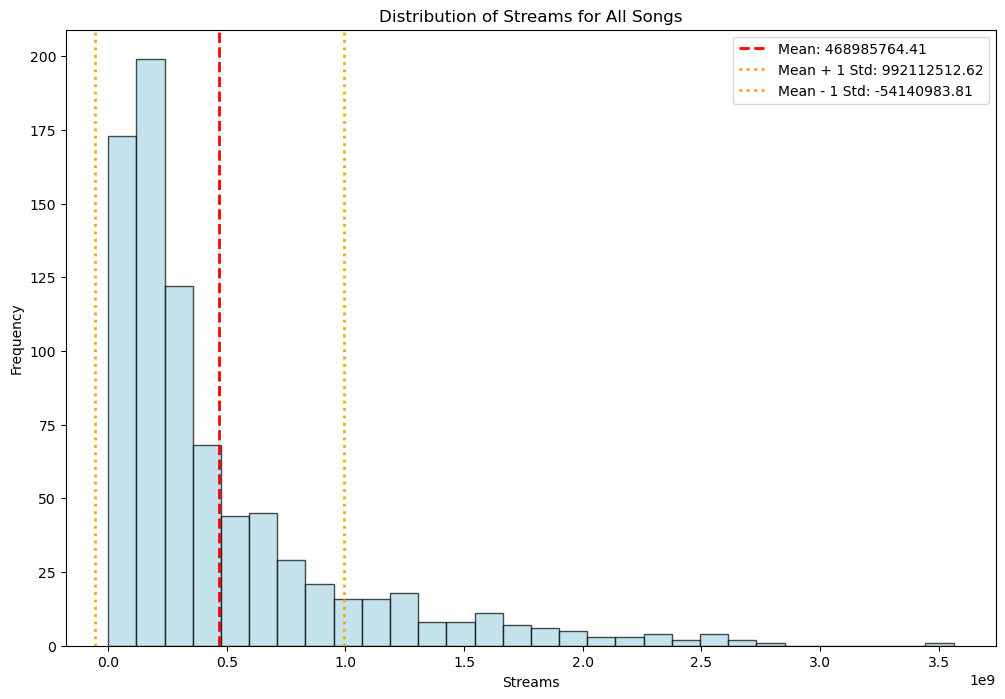

In [11]:
# Calculate mean and standard deviation of streams
mean_streams = df_master['streams'].mean()
std_streams = df_master['streams'].std()
print(f'Mean: {mean_streams}')
print(f'Standard Deviation: {std_streams}')

# Create a histogram
plt.figure(figsize=(12, 8))  # Set the figure size
plt.hist(df_master['streams'], bins=30, alpha=0.7, color='lightblue', edgecolor='black')

# Add vertical lines for mean and mean +/- standard deviation
plt.axvline(mean_streams, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_streams:.2f}')
plt.axvline(mean_streams + std_streams, color='orange', linestyle='dotted', linewidth=2, label=f'Mean + 1 Std: {mean_streams + std_streams:.2f}')
plt.axvline(mean_streams - std_streams, color='orange', linestyle='dotted', linewidth=2, label=f'Mean - 1 Std: {mean_streams - std_streams:.2f}')

# Name the axes and set the title
plt.xlabel('Streams')
plt.ylabel('Frequency')
plt.title('Distribution of Streams for All Songs')
plt.legend()
plt.show()

With the graph above, we can see that a large frequency of songs have streams lower than the mean; most songs have a lower number of streams, suggesting that while some songs achieve high popularity, the majority do not. Also, we can see that the standard deviation is extremely high, this means that there is significant variability in the number of streams among songs - the outliers within our data, are very much outliers. We have songs with 3.5 billion streams which is around 5.79 standard deviations away from the mean; this is something we have to keep in mind when predicting values as this creates large variance.

Now that we have an idea of the distribution of streams, what we can do next is to see how the other features relate to the number of streams a song has. In our case, we will be using the "musical elements" of the song and their correlation to streams.

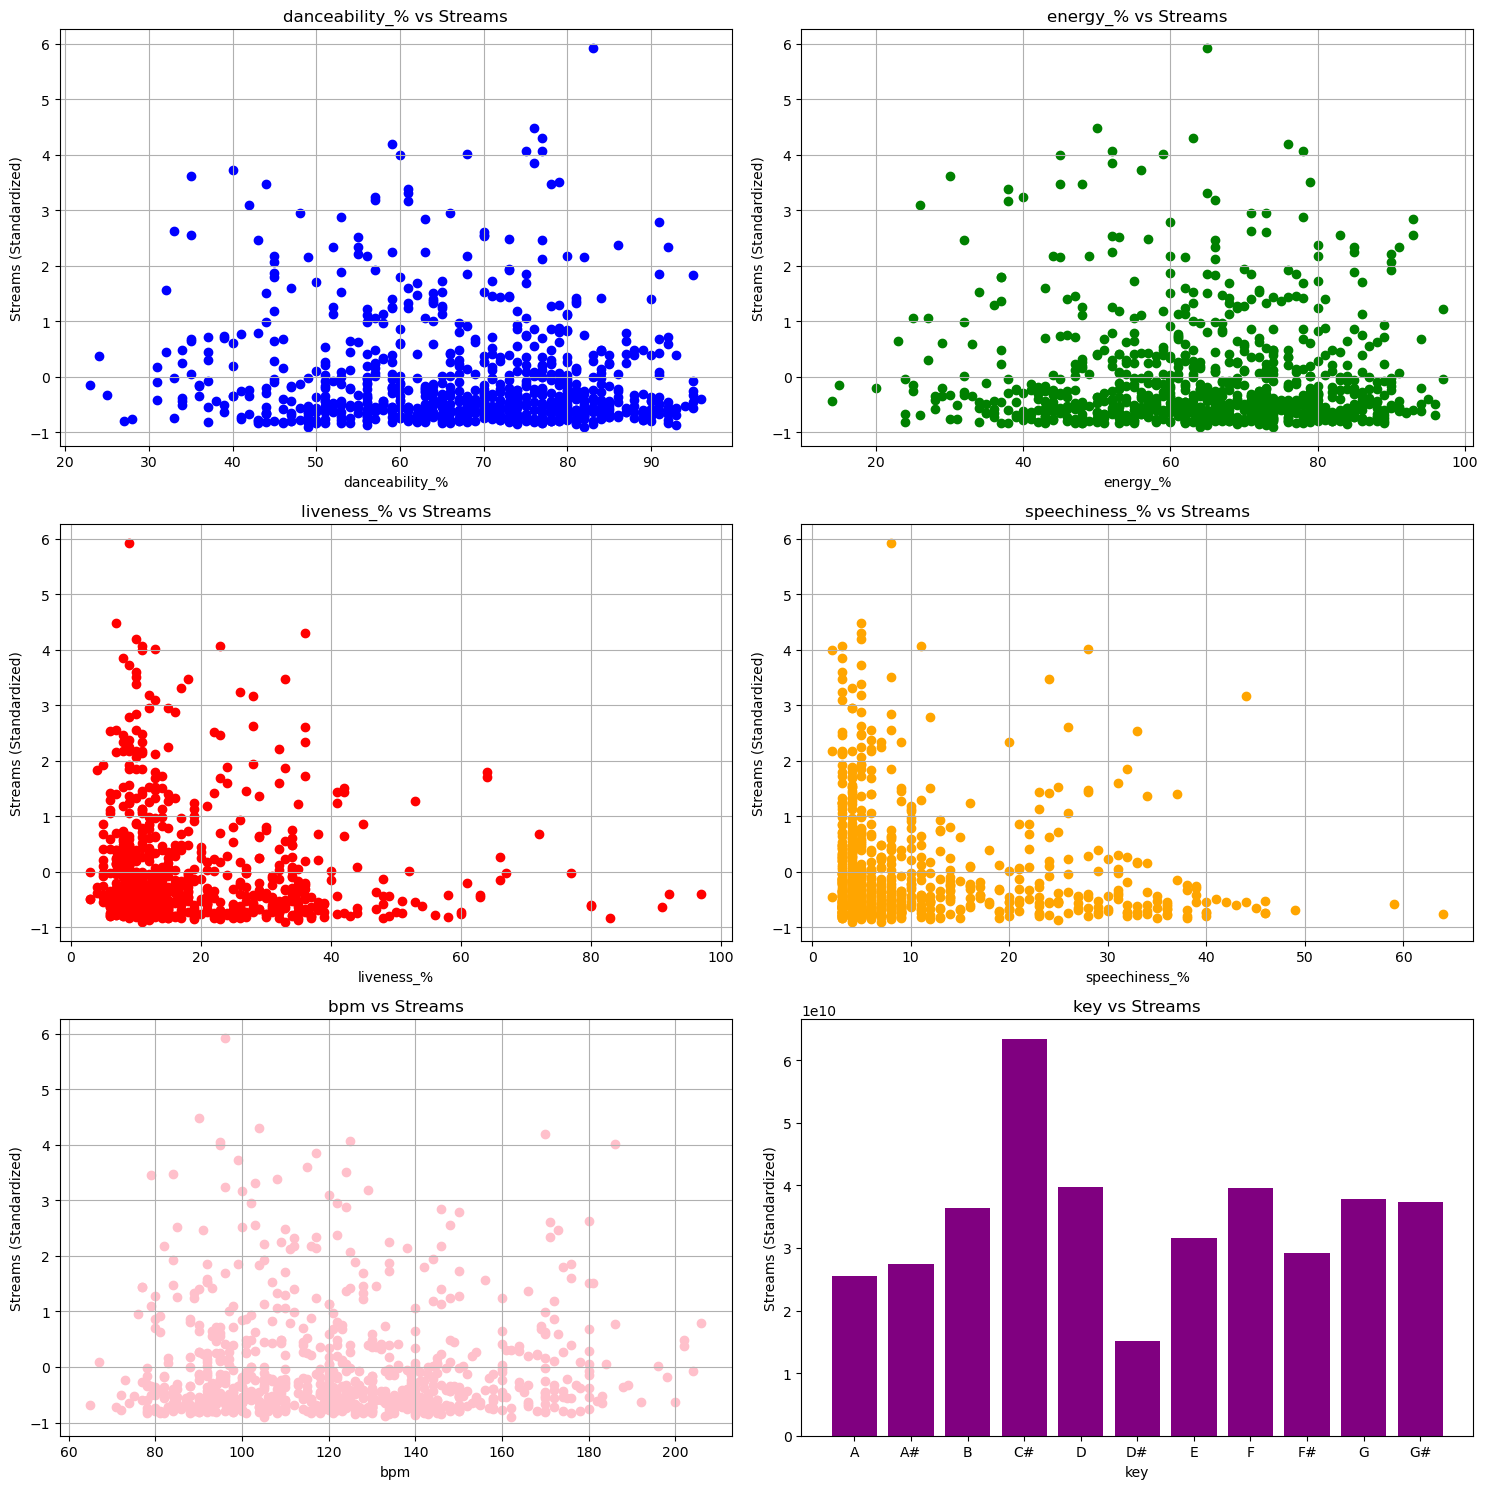

In [12]:
# Musical Elements in relation to the Streams
# Plot danceability, energy, liveness, speechiness against Total Streams
elements = ["danceability_%", "energy_%", "liveness_%", "speechiness_%", "bpm", "key"]
colors = ['blue', 'green', 'red', 'orange', 'pink', 'purple']

mean_streams = np.mean(df_master['streams'])
std_streams = np.std(df_master['streams'])

# Standardize the 'streams' feature
df_master['streams_standardized'] = (df_master['streams'] - mean_streams) / std_streams

# Create a scatter plot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()

# Iterate over each musical element
for i, element in enumerate(elements):
    # Create a scatter plot for the current element
    if element == "key":
        songs_by_key = df_master.groupby('key')['streams'].sum()
        plt.bar(songs_by_key.index.astype(str), songs_by_key.values, color=colors[i])
    else:
        axes[i].scatter(df_master[element], df_master['streams_standardized'], color=colors[i])
        axes[i].grid(True)
    
    axes[i].set_xlabel(element)
    axes[i].set_ylabel('Streams (Standardized)')
    axes[i].set_title(f'{element} vs Streams')

plt.tight_layout()
plt.show()

* Danceability
  - The correlation that danceability has with streams seems to be pretty low. The spread of the data doesn't imply some relation that we can utilize; the general distribution of the danceability of songs seems to be between 60-80, however the points with higher streams aren't clustered around any specific range.
* Energy
  - The energy follows much of the same as danceability; here, the general distribution of energy lies within the 40-80 range, and, again, the streams are not clustered around any range. This seems to imply that the success of a song doesn't have much to do with the energy.
* Liveness
  - The liveness feature does provide a different graph, when compared to the previous, we can see that the liveness score is clustered around the 0-40 range, and the streams seem to be higher when the liveness is ~10. However, this could simply be because songs tend to have a lower liveness score, and since so many with a lower score exist, one with a large number of streams is bound to exist.
* Speechiness
  - Speechiness seems to be similar to the liveness, in relation to streams. This range lies closer to 0-10, and similar to liveness, it just might be the case since so many exist in that range, theres bound to be a song with a large number of streams.
* BPM
  - BPM is similar to danceability and energy, there doesn't seem to be some correlation between these variables.
* Key
  - When looking at the key bar graph, we can see a large total stream amount for C#; this could imply that songs written in that key tend to be more popular. One thing we have to keep in mind however, is that our data has large outliers, which means that the C# group could be "boosted" because of a couple songs with a large stream count.

Time is an important aspect of our data that we have to further delve into. We will initially be looking at how the release month of the song relates to total streams. One thing we must keep in mind is that songs that are released further back have more time to accrue streams. In this case, however, we are simply looking at month, irrespective of year, in relation to streams to possibly see some correlation between release month and total number of streams.

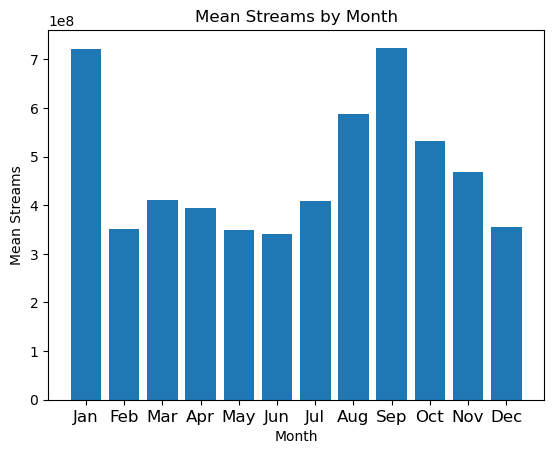

In [13]:
# Group the song by release month and calculate Mean streams for each month
monthly_streams = df_master.groupby('released_month')['streams'].mean()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create a bar plot
plt.bar(monthly_streams.index, monthly_streams.values)
plt.xlabel('Month')
plt.ylabel('Mean Streams')
plt.title('Mean Streams by Month')
# Set the x-axis ticks to represent the months
plt.xticks(range(1, 13), months, fontsize=12)
plt.show()

Here we can see that January and September has the highest number of streams, with May, June, Feburary, and December with the lowest. When considering this data it is important to note that Februrary's score would naturally be lower given that it has fewer days than other months.

It is also important to check for outliers. Lets display the top 5 songs for each month to search for them.

In [14]:
# For every month, display the top 5 songs that were released within it

# Group by release month
for month,group in df_master.groupby('released_month'):
    # Get top 5
    top_songs_per_month = group.nlargest(5, 'streams')
    print(f"\nTop songs for {months[month-1]}:")
    for index, row in top_songs_per_month.iterrows():
        print(f"Title: {row['track_name'].ljust(50)}Streams: {row['streams']}")


Top songs for Jan:
Title: Shape of You                                      Streams: 3562543890
Title: Believer                                          Streams: 2594040133
Title: Perfect                                           Streams: 2559529074
Title: Thinking Out Loud                                 Streams: 2280566092
Title: Counting Stars                                    Streams: 2011464183

Top songs for Feb:
Title: Something Just Like This                          Streams: 2204080728
Title: The Night We Met                                  Streams: 1410088830
Title: Everybody Wants To Rule The World                 Streams: 1205951614
Title: Dark Red                                          Streams: 920045682
Title: La Santa                                          Streams: 759208783

Top songs for Mar:
Title: HUMBLE.                                           Streams: 1929770265
Title: Levitating (feat. DaBaby)                         Streams: 1802514301
Title: Call Out My

When analyzing the data Janurary has the only song with over 3 billion streams, which is "Shape of You". In addition October had the song with the second highest number of streams, but when looking at the sums these top five get, we get this:

January: 13,008,143,372

February: 6,499,375,637

March: 7,845,308,972

April: 7,843,360,625

May: 8,406,589,228

June: 9,705,898,007

July: 6,823,889,321

August: 9,112,975,397

September: 11,087,113,868

October: 9,977,774,868

November: 8,457,369,739

December: 7,242,446,053

With the exception of June, the rest of the months mirror the top monthly streams, further indicating the prevelance of outliers. Another variable we could consider is the number of songs released to see if that impacts the number of streams.

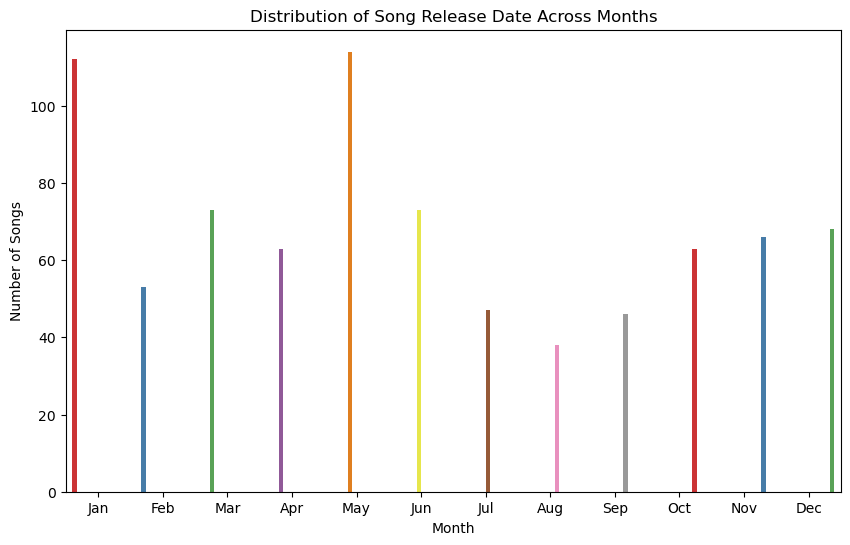

In [15]:
# Create a violin plot
plt.figure(figsize=(10,6))  # Set the figure size
sns.countplot(x='released_month', data=df_master, hue='released_month', palette="Set1")
plt.legend().set_visible(False)
plt.xlabel('Month')
plt.ylabel('Number of Songs')
plt.title('Distribution of Song Release Date Across Months')
# Set the x-axis ticks to represent the months
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

We can see that January produced the top 2 most songs, which was the same for release month streams. In contrast, despite May have a low release month streams, it also produces the top 2 amount of songs. Given this conflicting data, lets also check how release year plays into number of streams.

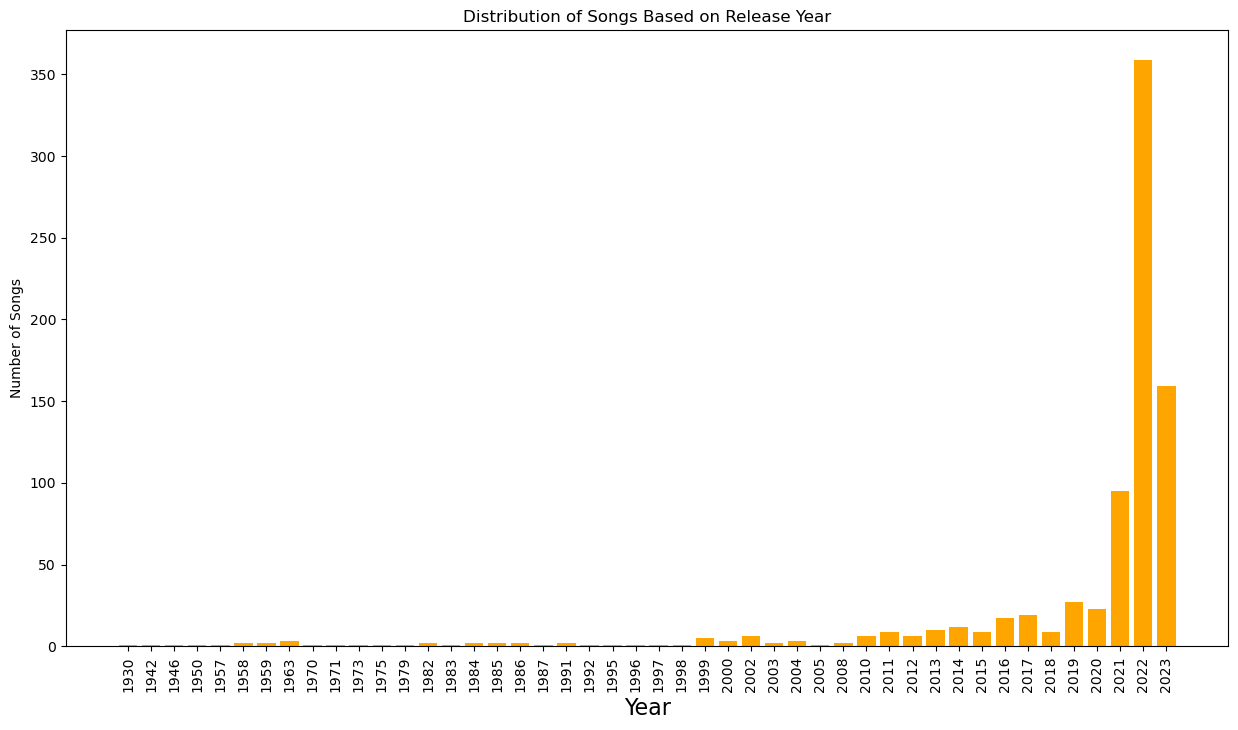

In [16]:
# Show the Distribution of Songs based on their Release Date
song_release_year = df_master.groupby('released_year').size()

# Create a bar chart
plt.figure(figsize=(15, 8))
plt.title('Distribution of Songs Based on Release Year')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Songs')
plt.bar(song_release_year.index.astype(str), song_release_year.values, color='orange')
plt.xticks(rotation=90)
plt.show()

Here we see there is a huge prevalence of 2022 songs in the dataframe. After that we see 2023 with the second highest and 2021 as the third. Given that the dataframe features the top spotify songs of 2023, we could infer that newer songs will have a higher average ranking in the spotify charts. Because of the large spread of yearly release dates, we can also infer that certain classics stay on the spotify charts. The higher value of 2022 songs versus 2023 goes against the idea of newer songs performing the best, but that could be explained as the 2023 songs not having enough time to properly gain traction with the spotify user base.

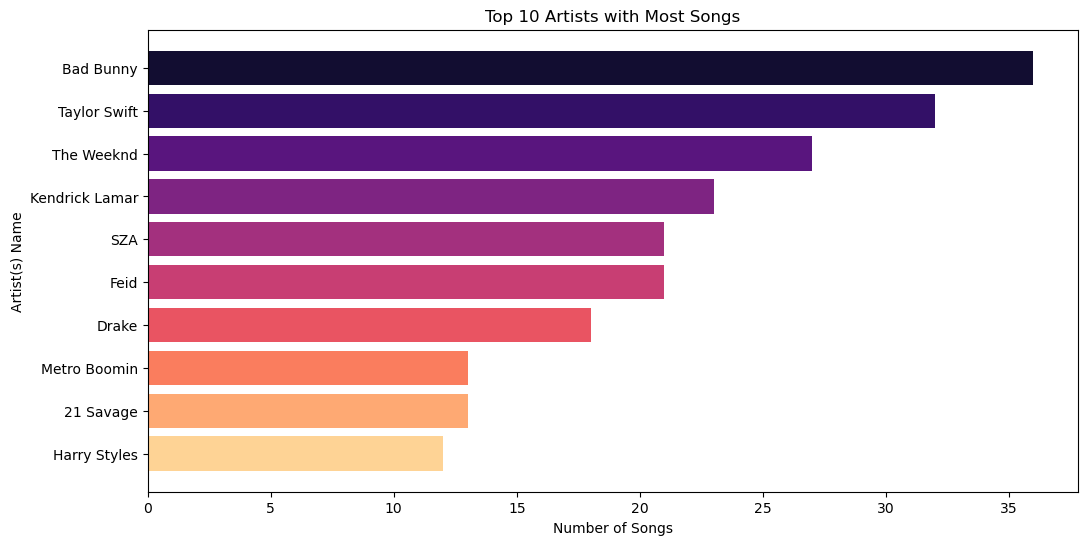

In [17]:
# Explore the top 10 best artist in the data set and make a bar plot
all_artists = pd.Series([artist for sublist in df_master['artist'] for artist in sublist])
artist_counts = all_artists.value_counts()
top_artists = artist_counts.head(10)

# Plot the bar plot using seaborn
colors = sns.color_palette('magma', len(top_artists))
plt.figure(figsize=(12, 6))
bars = plt.barh(top_artists.index, top_artists.values, color=colors)
plt.xlabel('Number of Songs')
plt.ylabel('Artist(s) Name')
plt.title('Top 10 Artists with Most Songs')
plt.gca().invert_yaxis()  # Ensure the top artist is at the top of the plot
plt.show()

Next, the artist featured on a song has a large impact on its potentional success. We can see above the following artists that have the most top songs in 2023.

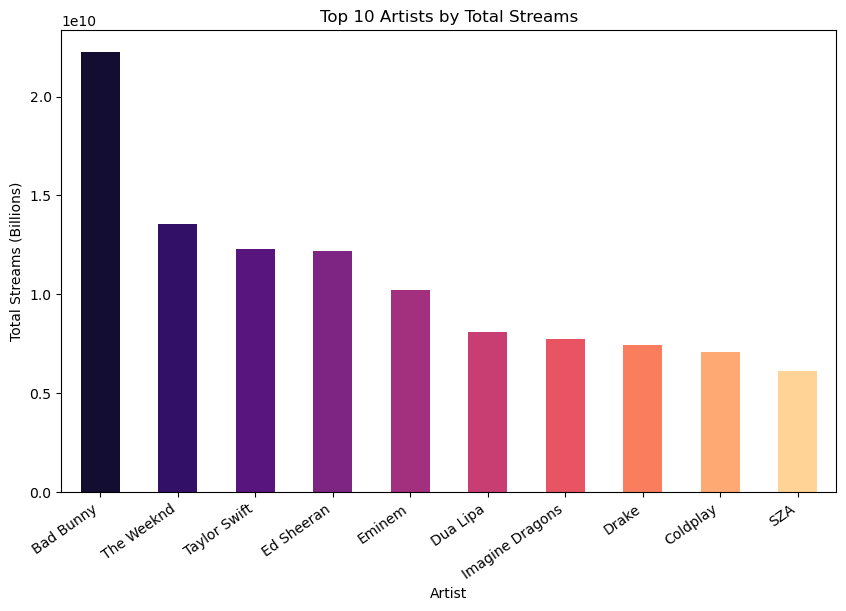

In [18]:
# Plot the top 10 artists based on number of streams
df_master['streams'] = pd.to_numeric(df_master['streams'], errors='coerce')
data = []
for _, row in df_master.iterrows():
    for artist in row['artist']:
        data.append({'artist': artist, 'streams': row['streams']})

flat_df = pd.DataFrame(data)
artist_streams = flat_df.groupby('artist')['streams'].sum()

# Get the top 10 artists
top_10_artists = artist_streams.nlargest(10)
colors = sns.color_palette('magma', len(top_10_artists))

# Plot the data
plt.figure(figsize=(10, 6))
top_10_artists.plot(kind='bar', color=colors)
plt.title('Top 10 Artists by Total Streams')
plt.xlabel('Artist')
plt.ylabel('Total Streams (Billions)')
plt.xticks(rotation=35, ha='right')
plt.show()

Now, we look at the top 10 artists with the most streams. As with number of releases, Bad Bunny, the Weekend, and Taylor Swift all were top 3 in both metrics, signifying their importance when it comes to producing popular music.

Lastly, we create a heatmap in order to identify if there's correlation beteween any variables of interest that we haven't yet considered.

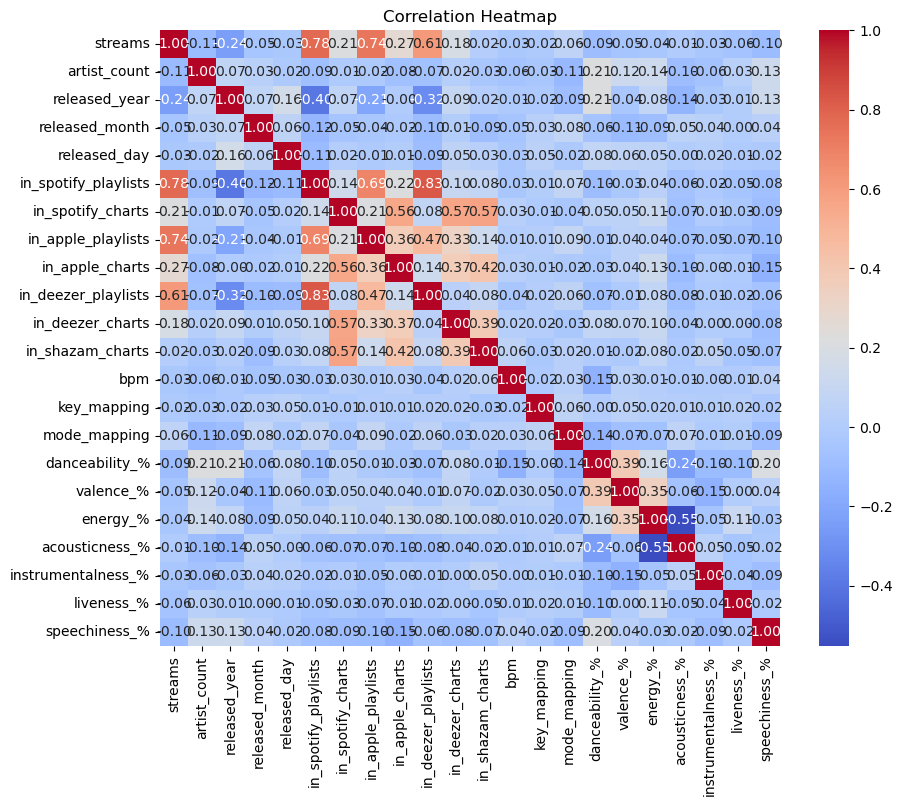

In [19]:
variables_of_interest = ['streams', 'artist_count', 'released_year','released_month','released_day','in_spotify_playlists','in_spotify_charts',
            'in_apple_playlists','in_apple_charts','in_deezer_playlists','in_deezer_charts','in_shazam_charts','bpm', "key_mapping",
             "mode_mapping", 'danceability_%','valence_%','energy_%','acousticness_%','instrumentalness_%','liveness_%','speechiness_%']

# Select the subset of the DataFrame containing only the variables of interest
subset_df = df_master[variables_of_interest]
correlation_matrix = subset_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

Let's look at the color of each cell to see the strength and direction of the correlations. Darker colors indicate stronger correlations, while lighter colors indicate weaker correlations. Positive correlations (when one variable increases, the other variable tends to increase) are usually represented by warm colors, such as red or orange. Negative correlations (when one variable increases, the other variable tends to decrease) are usually represented by cool colors, such as blue or green. 

We see a high correlation between streams and rank in playlists, this suggests that a song's success on a platform would most likely also translate to success on another platform. We could also see the postive correlation between the valence, which measures how positive a song is, and the danceability. The more positive the song is, the higher the danceability and energy. There's also the negative correlation between the energy and the acousticness of the song. 

## Part 4: Model: Data Transformation, Analysis, Hypothesis Testing, Machine Learning

In this part of the Data Science Pipeline we now analyze our data in order to develop predictive models of the data that we collected. By doing this we can use elements of an existing song and be able to predict how successful it will be.

**Hypothesis Testing**

Hypothesis Testing is the process of taking our sample data and determining whether or not an assumption (our hypothesis) holds true. In this process we first create our hypothesis. Then from that, we create a null hypothesis (our hypothesis isn’t significant), or the alternative hypothesis (our hypothesis holds significance).  We then set a significance level which determines the minimum likelihood needed for a hypothesis to have significant effect, otherwise known as a p-value. Then we look at our data to decide on a test statistic and compare it to the significance level to determine if a hypothesis is null or alternative (we usually want an alternative hypothesis). 

Learn more here: https://www.kdnuggets.com/2023/02/hypothesis-testing-data-science.html

**Data Transformation to Address Skew**

From the plots above, we can see some of the features being skewed. Let's look at how skewed our data for the songs are in terms of their speechiness, danceability, liveness, instrumentalness, energy, valence, acousticness, and bpm.

In [20]:
print(df_master['speechiness_%'].skew())
print(df_master['danceability_%'].skew())
print(df_master['liveness_%'].skew())
print(df_master['instrumentalness_%'].skew())
print(df_master['energy_%'].skew())
print(df_master['valence_%'].skew())
print(df_master['acousticness_%'].skew())
print(df_master['bpm'].skew())

1.8331109487144102
-0.4544746445596342
2.133235379055188
6.897938489992846
-0.38072340103730046
0.024200599326330785
0.9702110743781299
0.43122396597614276


As we can see, features such as speechiness, liveness, instrumentalness are extremely right-skewed. Let's try Log Transformation on these features because it handles right-skewdness well by compressing the range the data and reduce the impact of large values. Acousticness is moderately right-skewed so we would like to apply Square Root Transformation. Ideally, we would want features to be as normally distributed as possible because most machine learning models assume normally distributed data for optimal performance. 

In [21]:
# np.log1p(x) is equivalent to np.log(1 + x)
df_master['speechiness_log'] = np.log1p(df_master['speechiness_%'])
df_master['liveness_log'] = np.log1p(df_master['liveness_%'])
df_master['instrumentalness_log'] = np.log1p(df_master['instrumentalness_%'])

df_master['acousticness_sqrt'] = np.sqrt(df_master['acousticness_%'])

Here are the skewness scores after transformations

In [22]:
print(df_master['speechiness_log'].skew())
print(df_master['liveness_log'].skew())
print(df_master['instrumentalness_log'].skew())
print(df_master['acousticness_sqrt'].skew())

0.8463951864688193
0.6325389594905945
4.019990965519153
0.19979184980671136


**Importations**

We are using several Python libraries for statistical analysis and machine learning. statsmodels.api and statsmodels.formula.api help us estimate and test statistical models. scikit-learn tools like train_test_split split our data, while LinearRegression provides baseline model. Finally, mean_squared_error and r2_score evaluate our models' accuracy and performance.

In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**Split and Feature Selection**

We're splitting 20% of the dataset for testing, 80% for training because it's common practice, setting the random state to ensure we generate the same random numbers each time we run the code. We're using all of the variables available, especially the transformed features, except for the target feature, which is the number of streams. 

In [24]:
X = df_master[['artist_count', 'bpm', "key_mapping", "mode_mapping", 'danceability_%', 'in_spotify_playlists','in_spotify_charts',
            'in_apple_playlists','in_apple_charts','in_deezer_playlists','in_deezer_charts','in_shazam_charts', 'valence_%',
            'energy_%','acousticness_sqrt','instrumentalness_log','liveness_log', 'speechiness_log']]
y = df_master['streams']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Linear Regression Model**

Mean Squared Error: 8.03967273846191e+16
R-squared: 0.7377984270436072


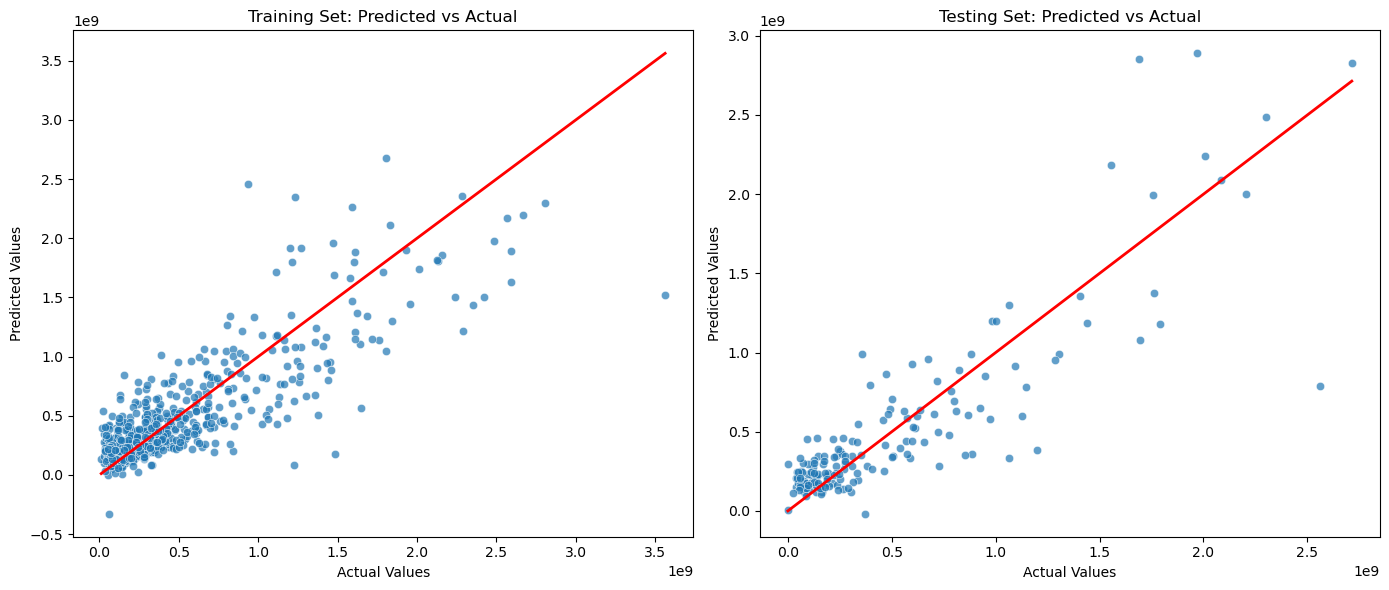

In [25]:
# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Visualize the results
plt.figure(figsize=(14, 6))

# Training set
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_pred_train, alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', lw=2)
plt.title('Training Set: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Testing set
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Testing Set: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

**Interpretation of the Results**

The MSE is quite high. The predictions might not be very close to the actual values. We can see from the plot that the higher the streams, the less accurate the predictions are. Although the R-squared value is fairly good, 0.7425 means that 74.25% of the variance in the target variable is explained. There's still 25.75% that is not explained, suggesting that the model is still missing some important patterns. 

**Model Improvement**

Linear regression assumes a linear relationship between the features and the target but since we're missing some important pattern, they could have non-linear relationships. Polynomial feautures can help capture these relationships by adding higher-degree terms, the model becomes more flexible and capable of fitting more complex patterns in the data. In this case, let's square up the features. 

**Linear Regression using Poly Features**

Training Mean Squared Error: 2.984660415999511e+16
Training R-squared: 0.8871293403909434
Testing Mean Squared Error: 2.102070734945148e+17
Testing R-squared: 0.31444192929466996


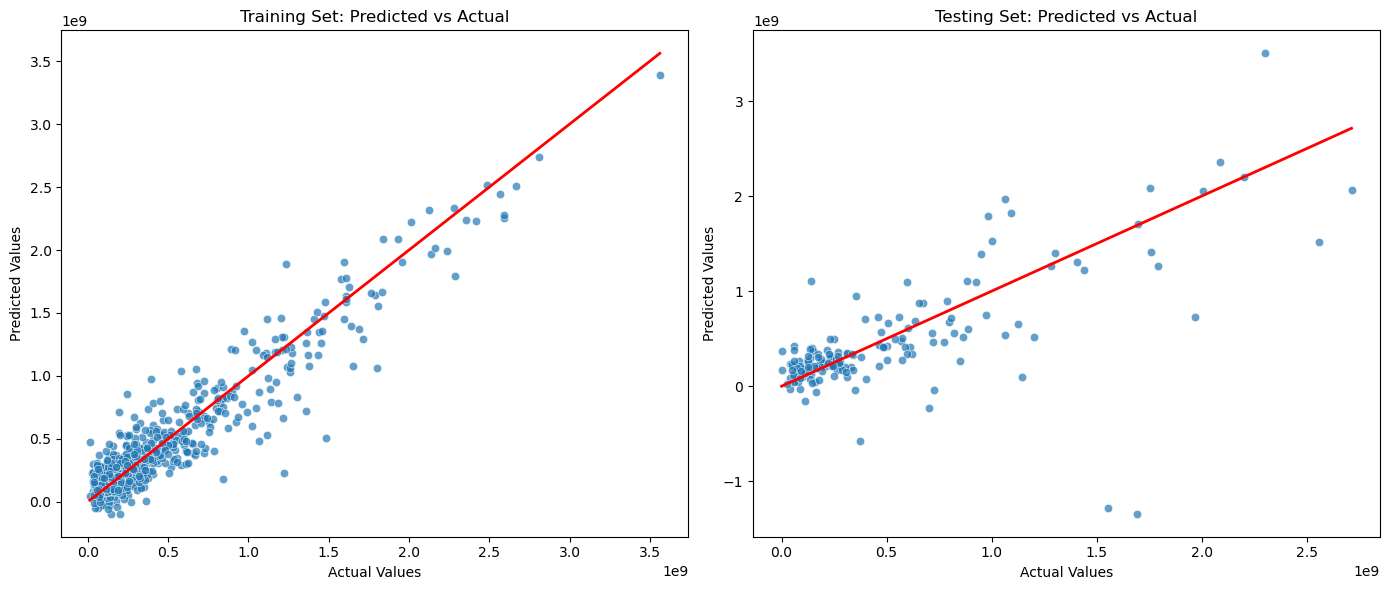

In [26]:
# Import library
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the linear regression model with polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_pred_train = model.predict(X_train_poly)
y_pred_test = model.predict(X_test_poly)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Training Mean Squared Error: {mse_train}")
print(f"Training R-squared: {r2_train}")
print(f"Testing Mean Squared Error: {mse_test}")
print(f"Testing R-squared: {r2_test}")

# Visualize the results
plt.figure(figsize=(14, 6))

# Training set
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_pred_train, alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', lw=2)
plt.title('Training Set: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Testing set
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Testing Set: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

**Interpretation of the Results and Future Improvements**

The model performs quite well on the training set with a low MSE and high R-squared value but performs poorly on the testing set with a high MSE and negative R-squared. This indicates that the model is overfitting, poor generalization to unseen data. 

In addition, when looking at the variables of interest, we can trim the variables that involve chart position and presence in playlists.  Essentially, anything directly related to number of streams. Lets do everything again, but this time without those variables.

Mean Squared Error: 2.929030992661983e+17
R-squared: 0.044741547948973226


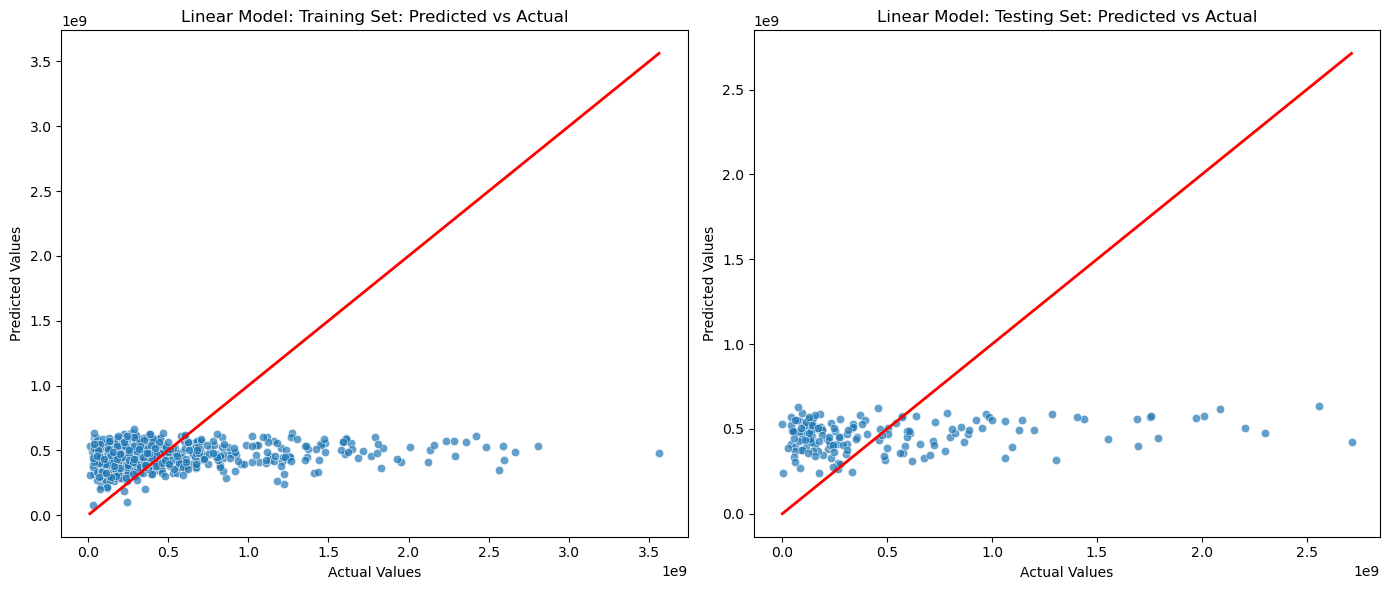

Training Mean Squared Error: 2.5497314223818493e+17
Training R-squared: 0.03577014682321367
Testing Mean Squared Error: 3.405300732634685e+17
Testing R-squared: -0.11058650959117178


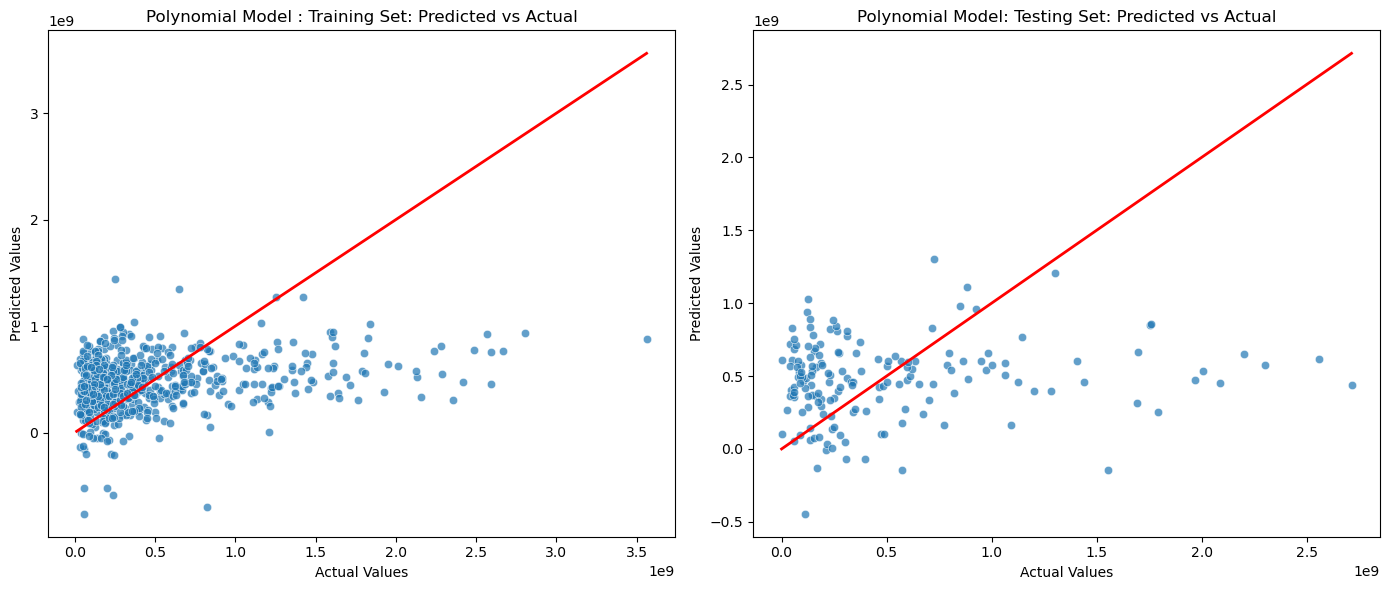

In [28]:
X = df_master[['artist_count', 'bpm', "key_mapping", "mode_mapping", 'danceability_%',
               'valence_%','energy_%','acousticness_sqrt','instrumentalness_log','liveness_log',
                'speechiness_log']]
y = df_master['streams']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Make predictions

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Visualize the results
plt.figure(figsize=(14, 6))

# Training set
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_pred_train, alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', lw=2)
plt.title('Linear Model: Training Set: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Testing set
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Linear Model: Testing Set: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

# Import library
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the linear regression model with polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_pred_train = model.predict(X_train_poly)
y_pred_test = model.predict(X_test_poly)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Training Mean Squared Error: {mse_train}")
print(f"Training R-squared: {r2_train}")
print(f"Testing Mean Squared Error: {mse_test}")
print(f"Testing R-squared: {r2_test}")

# Visualize the results
plt.figure(figsize=(14, 6))

# Training set
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_pred_train, alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', lw=2)
plt.title('Polynomial Model : Training Set: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Testing set
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Polynomial Model: Testing Set: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

Here we can see that our R squared value reaches -0.1.  This indiciates that our data has no correlation with determining number of streams. Considering that we only look at music elements, we can determine that those factors do not play a role in determining number of streams a song will achieve. 

## Part 5: Insight and Policy Decision

Now that we have our analysis and models we can use them to try to make useful insights into our population. 

When looking at the models between the musical elements and the number of streams a song has, we can conclude that there exists no correlation between them that we can leverage. Within our model, we used the numerical features of the song, such as the number of artists, the time it was released, and things like the mode, key, danceability, etc. 

Essentially what this tells us is that the success of a song isn't dependent on the elements of a song. Within our datasheet, we have songs of all types(genres) which implies that the musical elements between them are also quite different, and, as we've seen prior, the variance that our dataset has, in regards to streams, is extremely high. What we can conclude from this is that there exists a multitude of factors beyond the musical elements within our dataset. There exist certain immeasurable factors such as the presence of an artist, and cultural relevance/significance; as well as, things like marketing factors, such as different promotion strategies that different artists have - what platforms they promote their songs on, how they promote it, etc. 

Consequently, a machine learning model based solely on musical attributes is insufficient for accurately predicting a song’s success, highlighting the need for a more holistic approach that encompasses a broader range of factors. By incorporating additional features into or data we could further improve our model in order to accurately predict the popularity of a particular song.

Even though our model and predictions were not usable, because we took the time and effort we were able to determine how to further improve our data for our future endeavors. At the end of the day, we went through the entire data science lifecycle; we collected data, processed it, analyzed it, and modeled it and while we didn't recieve any noteworthy insights, things like this happen in data science. 

**Bibliography**

Data Sources: 

https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023


Industry Knowledge: 

https://www.cnn.com/cnn-underscored/reviews/best-music-streaming-service

https://www.forbes.com/sites/forbesbusinesscouncil/2021/09/13/the-evolution-of-the-music-industry---and-what-it-means-for-marketing-yourself-as-a-musician/?sh=6264f546297a

https://www.billboard.com/business/business-news/ifpi-global-report-2024-music-business-revenue-market-share-1235637873/

Hypothesis Testing:

https://www.kdnuggets.com/2023/02/hypothesis-testing-data-science.html
